In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

D:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## 数据清洗与概览

In [2]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',encoding='gbk')

In [3]:
print(data.shape)
data.head()

(374, 13)


,ID,性别,年龄,职业,睡眠时长,睡眠质量,身体活动水平,压力水平,BMI,血压,心率,每日步数,睡眠障碍
0,1,男性,27,软件工程师,6.1,6,42,6,超重,126/83,77,4200,无
1,2,男性,28,医生,6.2,6,60,8,正常,125/80,75,10000,无
2,3,男性,28,医生,6.2,6,60,8,正常,125/80,75,10000,无
3,4,男性,28,销售代表,5.9,4,30,8,肥胖,140/90,85,3000,睡眠呼吸暂停
4,5,男性,28,销售代表,5.9,4,30,8,肥胖,140/90,85,3000,睡眠呼吸暂停


In [4]:
#检查是否有缺失值
data.describe()

,ID,年龄,睡眠时长,睡眠质量,身体活动水平,压力水平,心率,每日步数
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
# 将血压分为收缩压和舒张压
data['收缩压'] = data['血压'].apply(lambda x:int(x[:3]))
data['舒张压'] = data['血压'].apply(lambda x:int(x[4:]))

In [6]:
# 将性别分为 0和1，男性：1 女性：0
data['性别'] = data['性别'].apply(lambda x:1 if x=='男性' else 0)

In [7]:
#检测高血压和低血压人群
#高血压：收缩压>130 舒张压>80
#低血压：收缩压<90 舒张压<60
data['是否高血压'] = 0
data['是否低血压'] = 0
data.loc[(data['收缩压']>130)&(data['舒张压']>80),'是否高血压'] = 1
data.loc[(data['收缩压']< 90)&(data['舒张压'] < 60),'是否低血压'] = 1


In [8]:
data['是否高血压'].sum()

107

In [9]:
data['是否低血压'].sum()

0

In [10]:
#查看各类离散值的取值类型有哪些
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder().fit(data.iloc[:,[1,3,8,12]]).categories_

[array([0, 1], dtype=int64),
 array(['主管', '会计师', '医生', '工程师', '律师', '护士', '科学家', '老师', '营业员', '软件工程师',
        '销售代表'], dtype=object),
 array(['正常', '肥胖', '超重'], dtype=object),
 array(['失眠', '无', '睡眠呼吸暂停'], dtype=object)]

In [11]:
data['睡眠障碍'].value_counts()/data.shape[0]

睡眠障碍
无         0.585561
睡眠呼吸暂停    0.208556
失眠        0.205882
Name: count, dtype: float64

## 模型预测

In [12]:
X = data.loc[:,~data.columns.isin(['ID','血压','睡眠障碍','职业','BMI'])]
Y = data['睡眠障碍'].ravel()
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)

In [13]:
score_modellist = []
#存储各个模型的准确度

### 决策树

0.8856330014224751


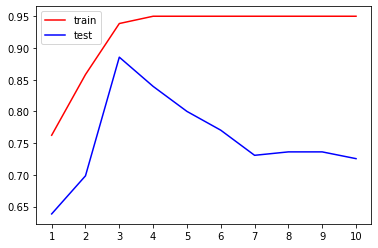

In [14]:
from sklearn.tree import DecisionTreeClassifier as DTC
tr = []
te = []
for i in range(10):
    clf = DTC(random_state=1,max_depth=i+1)
    clf = clf.fit(xtrain,ytrain)
    score_tr = clf.score(xtrain,ytrain)
    score_te = cross_val_score(clf,X,Y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()
score_modellist.append(max(te))

### 随机森林

0.9043385490753911


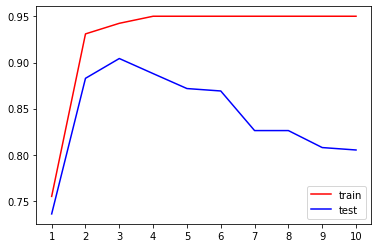

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC
tr = []
te = []
for i in range(10):
    rfc = RFC(random_state=2,max_depth=i+1,n_estimators=100)
    rfc = rfc.fit(xtrain,ytrain)
    score_tr = rfc.score(xtrain,ytrain)
    score_te = cross_val_score(rfc,X,Y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()
score_modellist.append(max(te))

### SVM

0.8184210526315789


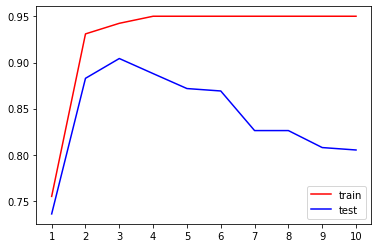

In [16]:
from sklearn.svm import SVC
sv_clf = SVC(gamma='auto')
sv_clf.fit(xtrain, ytrain)
print(cross_val_score(sv_clf,X,Y,cv=10).mean())
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()
score_modellist.append(cross_val_score(sv_clf,X,Y,cv=10).mean())

### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(xtrain, ytrain)
print(cross_val_score(kn_clf,X,Y,cv=10).mean())
score_modellist.append(cross_val_score(kn_clf,X,Y,cv=10).mean())

0.8615220483641537


In [18]:
score_modellist

[0.8856330014224751,
 0.9043385490753911,
 0.8184210526315789,
 0.8615220483641537]